# Cluster Analysis

## Import the relevant libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [36]:
iris = pd.read_csv('TASK_2_Iris.csv')

iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [38]:
x = iris[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y= iris[['Species']]

## Plot the data

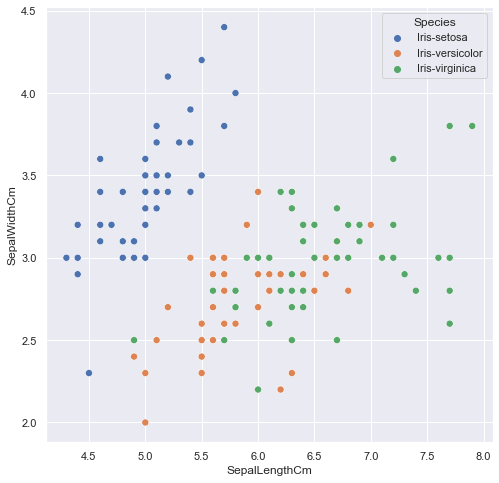

In [39]:
#plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'])
#plt.xlabel('PetalLengthCm')
#plt.ylabel('PetalWidthCm')
#plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=iris,hue="Species",s = 50)
plt.show()

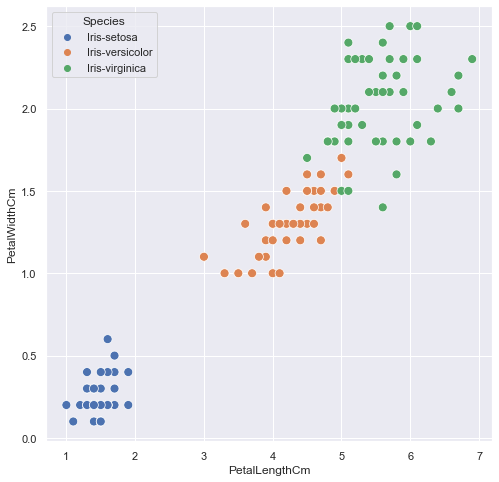

In [40]:
#plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])
#plt.xlabel('SepalLengthCm')
#plt.ylabel('SepalWidthCm')
#plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=iris,hue="Species",s = 80)
plt.show()

## Clustering (unscaled data)

In [41]:
cdata = iris.copy()
cdata =cdata.drop('Species',axis = 1)
cdata
kmeans = KMeans(2)
kmeans.fit(cdata)


KMeans(n_clusters=2)

In [42]:
clusters = iris.copy()
clusters =clusters.drop('Species',axis = 1)
clusters['cluster_pred']=kmeans.fit_predict(cdata)

clusters

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_pred
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

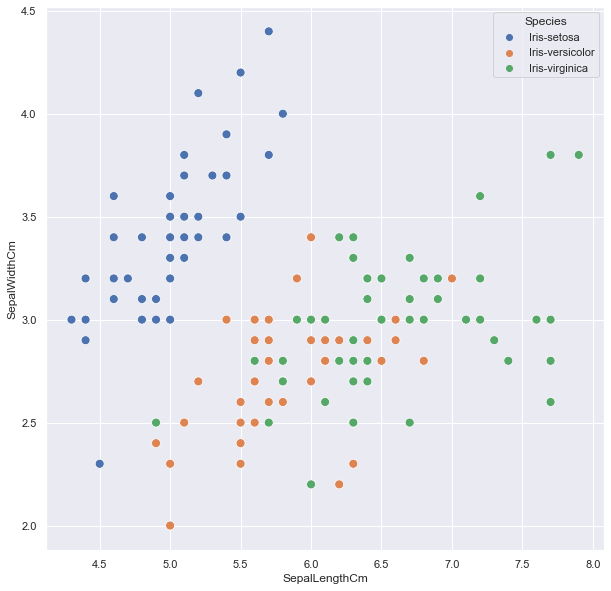

In [43]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.figure(figsize=(10,10))
sns.scatterplot(clusters['SepalLengthCm'], clusters['SepalWidthCm'], data = iris, hue ='Species', c= clusters ['cluster_pred'], s = 80, cmap = 'rainbow')

## Standardize the variables

Import and use the <i> scale </i> function from sklearn to standardize the data. 

In [44]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(cdata)
x_scaled

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

## Clustering (scaled data)

In [11]:
kmeans_scaled = KMeans(2)

kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [12]:
clusters_scaled = iris.copy()
clusters_scaled = clusters_scaled.drop('Species',axis = 1)
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

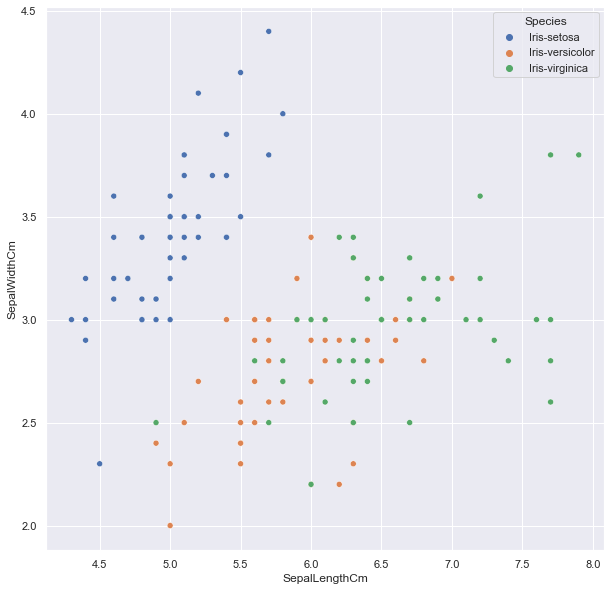

In [13]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.figure(figsize=(10,10))
sns.scatterplot(clusters_scaled['SepalLengthCm'], clusters_scaled['SepalWidthCm'], data = iris, hue ='Species', c= clusters_scaled ['cluster_pred'], s = 80, cmap = 'rainbow')

## The Elbow Method

### WCSS

In [14]:
wcss = [] # within clusters sum of square

cl_num = 10
for i in range(1,cl_num) :
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[749.9999999999998,
 273.7275610947794,
 177.05608895062977,
 148.50795780759043,
 123.17263095273614,
 100.58354094825121,
 90.569814392942,
 81.21329788308348,
 73.03362736861197]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

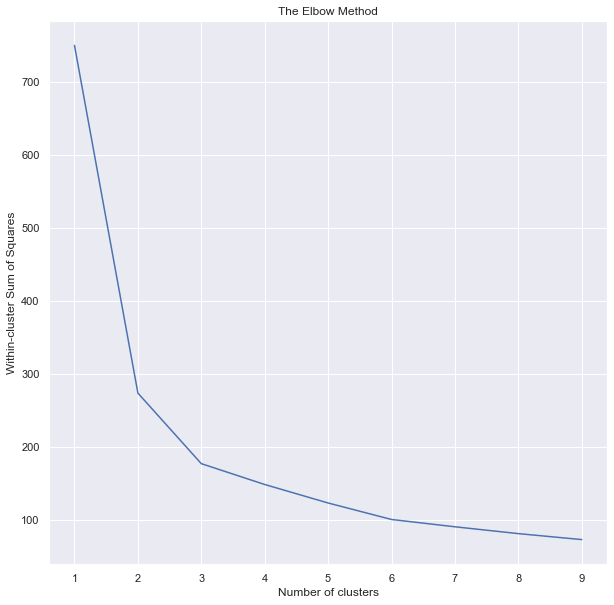

In [15]:
plt.figure(figsize=(10,10))
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## 3 Clusters

In [16]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(n_clusters=3)

In [17]:
clusters_3 = iris.copy()
clusters_3 = clusters_3.drop('Species',axis = 1)
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

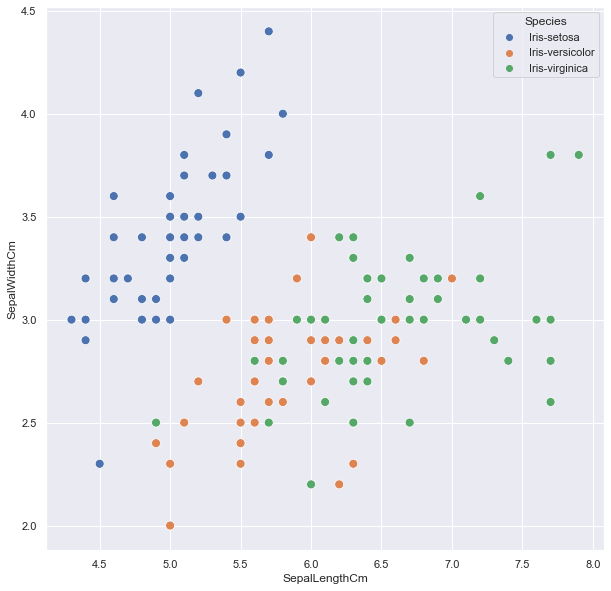

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(clusters_3['SepalLengthCm'], clusters_3['SepalWidthCm'],data = iris, hue ='Species', c= clusters_3 ['cluster_pred'],s = 80, cmap = 'rainbow')

plt.figure(figsize=(10,10))
sns.scatterplot(clusters_scaled['SepalLengthCm'], clusters_scaled['SepalWidthCm'], data = iris, hue ='Species', c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')